# Lab 4.08 - Off days

*(This exercise was generated by <https://rlanders.net/dataset-generator/>)*

In [2]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


You run a small business with four employees: Susan, Jimmy, Albert, and Camilla. Because you need three employees at work at any given time, only one employee ever has the day off. Unfortunately, everyone always wants Saturday off. One of your employees has confronted you and said that you favor some employees over others in providing Saturdays off. To investigate this, you pulled up a list of who has recently had Saturdays off each week (see `data/off-days.csv`).

Visualize the data and conduct a suitable statistical test to investigate this. Complete the full hypothesis testing process and draw all appropriate conclusions.

In [6]:
df = pd.read_csv('../data/off-days.csv')
df

,EmployeeName
0,Susan
1,Albert
2,Camilla
3,Albert
4,Susan
...,...
115,Susan
116,Susan
117,Susan
118,Susan


In [8]:
# Count how many Saturdays off per employee
counts = df['EmployeeName'].value_counts().sort_index()

print("Observed counts per employee:")
print(counts)

Observed counts per employee:
EmployeeName
Albert     42
Camilla    24
Jimmy       6
Susan      48
Name: count, dtype: int64


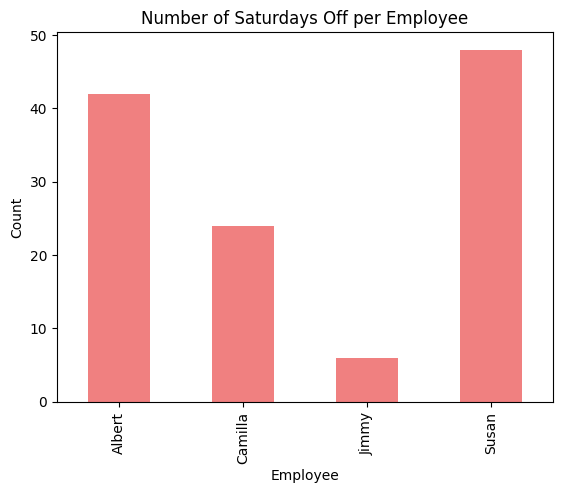

In [9]:
# Bar plot to visualize
counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Saturdays Off per Employee')
plt.xlabel('Employee')
plt.ylabel('Count')
plt.show()


In [14]:
# Total Saturdays
total_saturdays = counts.sum()

# Expected counts assuming fairness (equal distribution)
num_employees = len(counts)
expected_counts = [total_saturdays / num_employees] * num_employees


In [17]:
# Perform Chi-square goodness-of-fit test
from scipy.stats import chisquare
chi2_stat, p_value = chisquare(f_obs=counts.values, f_exp=expected_counts)


print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Hypothesis testing at alpha=0.05
if p_value < 0.05:
    print("Reject the null hypothesis: Saturdays off are NOT equally distributed.")
else:
    print("Fail to reject the null hypothesis: No evidence of unfair distribution of Saturdays off.")

Chi-square statistic: 36.000
P-value: 0.000
Reject the null hypothesis: Saturdays off are NOT equally distributed.
